### Random Forest
We used year, duration, budget, genre, and director. The categorical data was transformed using get_dummies and the rating class was transformed using label encoder. Since this is random forest, we did not need to scale our data. The training score was 99% and the testing score was 71.1%. When looking at the feature importance, we saw that the most popular splitting points were budget, duration, and year. Then came the genres, and finally directors. 

The grid search for this model included n_estimators (number of trees), max_depth (maximum levels per tree), max_features (number of features to consider when looking for a split), and max_samples(number of samples to draw from X to train each tree). With the optimized hyperparameters, the models test accuracy increased to 71.5%.

In [31]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from numpy.random import seed
seed(42)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow
tensorflow.keras.__version__
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


In [2]:
# Read in movie csv
movies = pd.read_csv("./Resources/imdb_final.csv")
movies.head()

,imdb_title_id,title,year,genre,duration,country,director,production_company,budget,total_votes,...,allover45,males,males18to29,males30to44,malesover45,females,females18to29,females30to44,femalesover45,rating_class
0,tt0035423,Kate & Leopold,2001,Comedy,118,USA,James Mangold,Konrad Pictures,48000000,75298,...,6.4,6.3,6.5,6.2,6.3,6.6,6.7,6.4,6.7,Good
1,tt0113026,The Fantasticks,2000,Musical,86,USA,Michael Ritchie,Michael Ritchie Productions,10000000,1082,...,5.4,5.3,5.4,5.4,5.3,5.7,5.6,5.8,5.6,Good
2,tt0118589,Glitter,2001,Drama,104,USA,Vondie Curtis-Hall,Twentieth Century Fox,22000000,20959,...,2.1,1.9,2.1,1.9,2.0,2.9,3.2,2.7,2.5,Bad
3,tt0118652,The Attic Expeditions,2001,Comedy,100,USA,Jeremy Kasten,Tse Tse Fly Productions,1000000,1588,...,4.6,5.0,4.7,5.1,4.6,4.8,5.8,4.6,4.6,Good
4,tt0120467,Vulgar,2000,Crime,87,USA,Bryan Johnson,Chango Productions,120000,3852,...,5.0,5.3,6.1,5.3,5.1,5.2,5.2,5.3,4.6,Good


In [3]:
# Set values for X and y
X = movies[["year", "genre", "duration", "director", "budget"]]
y = movies["rating_class"].values.reshape(-1,1)
print(X.shape, y.shape)

(5060, 5) (5060, 1)


In [4]:
data = X.copy()
data

,year,genre,duration,director,budget
0,2001,Comedy,118,James Mangold,48000000
1,2000,Musical,86,Michael Ritchie,10000000
2,2001,Drama,104,Vondie Curtis-Hall,22000000
3,2001,Comedy,100,Jeremy Kasten,1000000
4,2000,Crime,87,Bryan Johnson,120000
...,...,...,...,...,...
5055,2019,Comedy,84,Jon Lucas,5000000
5056,2019,Drama,94,Dan Sallitt,95000
5057,2019,Action,84,Glenn Miller,100000
5058,2019,Action,92,Keoni Waxman,3000000


In [5]:
# Dummy Encoding for genre column
data_binary_encoded = pd.get_dummies(data, columns= ["genre", "director"])
data_binary_encoded.head()

,year,duration,budget,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,...,director_Zack Snyder,director_Zackary Adler,director_Zak Knutson,director_Zak Penn,director_Zebediah De Soto,director_Zia Mojabi,director_Ziad H. Hamzeh,director_Zoe Quist,director_Zoran Lisinac,director_mink
0,2001,118,48000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,86,10000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,104,22000000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2001,100,1000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,87,120000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(data_binary_encoded, y, random_state=42) 

In [7]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)
encoded_y_train

array([2, 2, 2, ..., 2, 2, 2])

## Create Random Forest Model

In [8]:
rf = RandomForestClassifier(n_estimators = 50)
rf = rf.fit(X_train, encoded_y_train)
print(f"Random Forest Training Score: {rf.score(X_train, encoded_y_train)}")
print(f"Random Forest Testing Score: {rf.score(X_test, encoded_y_test)}")

Random Forest Training Score: 0.9994729907773386
Random Forest Testing Score: 0.7106719367588933


In [9]:
importances = rf.feature_importances_
importances

array([0.06206107, 0.09064812, 0.11882047, ..., 0.00051296, 0.00051002,
       0.0004154 ])

In [10]:
sorted(zip(rf.feature_importances_, data_binary_encoded.columns))

[(0.0, 'director_A.M. Lukas'),
 (0.0, 'director_Aaron Blaise'),
 (0.0, 'director_Aaron Burns'),
 (0.0, 'director_Aaron Mirtes'),
 (0.0, 'director_Aaron Woodley'),
 (0.0, 'director_Adam Bhala Lough'),
 (0.0, 'director_Adam Matalon'),
 (0.0, 'director_Adam Meyerowitz'),
 (0.0, 'director_Adam Thomas Anderegg'),
 (0.0, 'director_Adrienne Weiss'),
 (0.0, 'director_Akihiro Kitamura'),
 (0.0, 'director_Al Corley'),
 (0.0, 'director_Alex Ballar'),
 (0.0, 'director_Alex Keledjian'),
 (0.0, 'director_Alex Kurtzman'),
 (0.0, 'director_Alex Lvovsky'),
 (0.0, 'director_Alex Nam'),
 (0.0, 'director_Alex Wright'),
 (0.0, 'director_Alfonso Gomez-Rejon'),
 (0.0, 'director_Amanda Goodwin'),
 (0.0, 'director_Amanda Marsalis'),
 (0.0, 'director_Andrew Bellware'),
 (0.0, 'director_Andrew Black'),
 (0.0, 'director_Andrew Bowen'),
 (0.0, 'director_Andrew MacKenzie'),
 (0.0, 'director_Andrew Nackman'),
 (0.0, 'director_Andrew Van Slee'),
 (0.0, 'director_Andy Dick'),
 (0.0, 'director_Anghus Houvouras'),
 (0.0

In [11]:
encoded_predictions = rf.predict(X_test)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

print(f"Predictions: {encoded_predictions[:15]}")
print(f"Predicted classes: {prediction_labels[:15]}")
print(f"Actual Labels: {y_test[:15]}")

Predictions: [2 2 2 2 2 2 2 2 0 2 2 2 2 0 2]
Predicted classes: ['Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Bad' 'Good'
 'Good' 'Good' 'Good' 'Bad' 'Good']
Actual Labels: [['Good']
 ['Good']
 ['Excellent']
 ['Bad']
 ['Good']
 ['Good']
 ['Excellent']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Excellent']
 ['Good']
 ['Good']
 ['Good']]


In [12]:
rf = RandomForestClassifier(n_estimators = 50)
rf = rf.fit(X_train, encoded_y_train)
print(f"Random Forest Training Score: {rf.score(X_train, encoded_y_train)}")
print(f"Random Forest Testing Score: {rf.score(X_test, encoded_y_test)}")

Random Forest Training Score: 0.9992094861660079
Random Forest Testing Score: 0.7098814229249012


In [13]:
# CLassification report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_labels))

              precision    recall  f1-score   support

         Bad       0.64      0.50      0.56       280
   Excellent       0.50      0.09      0.15       161
        Good       0.73      0.90      0.81       824

    accuracy                           0.71      1265
   macro avg       0.62      0.50      0.51      1265
weighted avg       0.68      0.71      0.67      1265



In [33]:
# Confusion matrix
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix as cm
cm(y_test, prediction_labels)

array([[140,   4, 136],
       [ 10,  14, 137],
       [ 69,  10, 745]], dtype=int64)

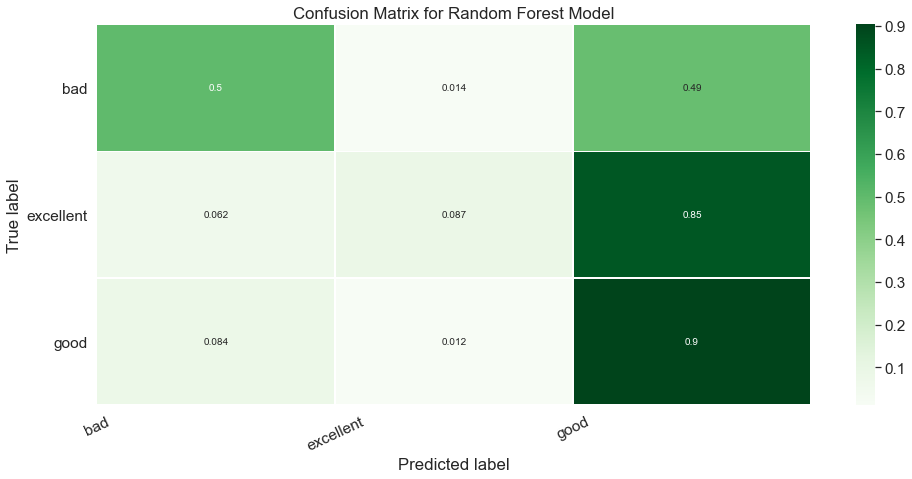

In [35]:
# Get and reshape confusion matrix data
matrix = cm(y_test, prediction_labels)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['bad', 'excellent', 'good']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## Grid Search

In [15]:
from sklearn.model_selection import GridSearchCV
n_estimators = [50, 150, 200]
max_features = [1, 5, 10]
max_depth = [10, 100, 200]
max_samples = [50, 200, 400]
param_grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, max_samples=max_samples)
grid = GridSearchCV(rf, param_grid, verbose=2, scoring = "accuracy")

In [16]:
grid.fit(X_train, np.ravel(encoded_y_train))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] max_depth=10, max_features=1, max_samples=50, n_estimators=50 ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, max_features=1, max_samples=50, n_estimators=50, total=   0.3s
[CV] max_depth=10, max_features=1, max_samples=50, n_estimators=50 ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=10, max_features=1, max_samples=50, n_estimators=50, total=   0.3s
[CV] max_depth=10, max_features=1, max_samples=50, n_estimators=50 ...
[CV]  max_depth=10, max_features=1, max_samples=50, n_estimators=50, total=   0.3s
[CV] max_depth=10, max_features=1, max_samples=50, n_estimators=50 ...
[CV]  max_depth=10, max_features=1, max_samples=50, n_estimators=50, total=   0.3s
[CV] max_depth=10, max_features=1, max_samples=50, n_estimators=50 ...
[CV]  max_depth=10, max_features=1, max_samples=50, n_estimators=50, total=   0.4s
[CV] max_depth=10, max_features=1, max_samples=50, n_estimators=150 ..
[CV]  max_depth=10, max_features=1, max_samples=50, n_estimators=150, total=   0.7s
[CV] max_depth=10, max_features=1, max_samples=50, n_estimators=150 ..
[CV]  max_depth=10, max_features=1, max_samples=50, n_estimators=150, total=   0.7s
[CV] max_depth=10, max_features=1, max_samples=50, n_estimators=150 ..
[CV]  max_depth=10, max_features=1, max_samples=50, n_estimators=150, tota

[CV]  max_depth=10, max_features=5, max_samples=50, n_estimators=150, total=   0.7s
[CV] max_depth=10, max_features=5, max_samples=50, n_estimators=200 ..
[CV]  max_depth=10, max_features=5, max_samples=50, n_estimators=200, total=   0.8s
[CV] max_depth=10, max_features=5, max_samples=50, n_estimators=200 ..
[CV]  max_depth=10, max_features=5, max_samples=50, n_estimators=200, total=   0.9s
[CV] max_depth=10, max_features=5, max_samples=50, n_estimators=200 ..
[CV]  max_depth=10, max_features=5, max_samples=50, n_estimators=200, total=   0.6s
[CV] max_depth=10, max_features=5, max_samples=50, n_estimators=200 ..
[CV]  max_depth=10, max_features=5, max_samples=50, n_estimators=200, total=   0.6s
[CV] max_depth=10, max_features=5, max_samples=50, n_estimators=200 ..
[CV]  max_depth=10, max_features=5, max_samples=50, n_estimators=200, total=   0.6s
[CV] max_depth=10, max_features=5, max_samples=200, n_estimators=50 ..
[CV]  max_depth=10, max_features=5, max_samples=200, n_estimators=50, 

[CV]  max_depth=10, max_features=10, max_samples=200, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=10, max_samples=200, n_estimators=50 .
[CV]  max_depth=10, max_features=10, max_samples=200, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=10, max_samples=200, n_estimators=50 .
[CV]  max_depth=10, max_features=10, max_samples=200, n_estimators=50, total=   0.2s
[CV] max_depth=10, max_features=10, max_samples=200, n_estimators=150 
[CV]  max_depth=10, max_features=10, max_samples=200, n_estimators=150, total=   0.4s
[CV] max_depth=10, max_features=10, max_samples=200, n_estimators=150 
[CV]  max_depth=10, max_features=10, max_samples=200, n_estimators=150, total=   0.4s
[CV] max_depth=10, max_features=10, max_samples=200, n_estimators=150 
[CV]  max_depth=10, max_features=10, max_samples=200, n_estimators=150, total=   0.4s
[CV] max_depth=10, max_features=10, max_samples=200, n_estimators=150 
[CV]  max_depth=10, max_features=10, max_samples=200, n_estim

[CV]  max_depth=100, max_features=1, max_samples=200, n_estimators=200, total=   1.3s
[CV] max_depth=100, max_features=1, max_samples=200, n_estimators=200 
[CV]  max_depth=100, max_features=1, max_samples=200, n_estimators=200, total=   1.4s
[CV] max_depth=100, max_features=1, max_samples=200, n_estimators=200 
[CV]  max_depth=100, max_features=1, max_samples=200, n_estimators=200, total=   1.4s
[CV] max_depth=100, max_features=1, max_samples=200, n_estimators=200 
[CV]  max_depth=100, max_features=1, max_samples=200, n_estimators=200, total=   1.6s
[CV] max_depth=100, max_features=1, max_samples=200, n_estimators=200 
[CV]  max_depth=100, max_features=1, max_samples=200, n_estimators=200, total=   1.5s
[CV] max_depth=100, max_features=1, max_samples=400, n_estimators=50 .
[CV]  max_depth=100, max_features=1, max_samples=400, n_estimators=50, total=   0.5s
[CV] max_depth=100, max_features=1, max_samples=400, n_estimators=50 .
[CV]  max_depth=100, max_features=1, max_samples=400, n_est

[CV]  max_depth=100, max_features=5, max_samples=400, n_estimators=50, total=   0.7s
[CV] max_depth=100, max_features=5, max_samples=400, n_estimators=50 .
[CV]  max_depth=100, max_features=5, max_samples=400, n_estimators=50, total=   0.6s
[CV] max_depth=100, max_features=5, max_samples=400, n_estimators=150 
[CV]  max_depth=100, max_features=5, max_samples=400, n_estimators=150, total=   1.4s
[CV] max_depth=100, max_features=5, max_samples=400, n_estimators=150 
[CV]  max_depth=100, max_features=5, max_samples=400, n_estimators=150, total=   1.6s
[CV] max_depth=100, max_features=5, max_samples=400, n_estimators=150 
[CV]  max_depth=100, max_features=5, max_samples=400, n_estimators=150, total=   1.4s
[CV] max_depth=100, max_features=5, max_samples=400, n_estimators=150 
[CV]  max_depth=100, max_features=5, max_samples=400, n_estimators=150, total=   1.6s
[CV] max_depth=100, max_features=5, max_samples=400, n_estimators=150 
[CV]  max_depth=100, max_features=5, max_samples=400, n_esti

[CV]  max_depth=100, max_features=10, max_samples=400, n_estimators=200, total=   1.9s
[CV] max_depth=100, max_features=10, max_samples=400, n_estimators=200 
[CV]  max_depth=100, max_features=10, max_samples=400, n_estimators=200, total=   1.9s
[CV] max_depth=100, max_features=10, max_samples=400, n_estimators=200 
[CV]  max_depth=100, max_features=10, max_samples=400, n_estimators=200, total=   1.9s
[CV] max_depth=100, max_features=10, max_samples=400, n_estimators=200 
[CV]  max_depth=100, max_features=10, max_samples=400, n_estimators=200, total=   1.7s
[CV] max_depth=200, max_features=1, max_samples=50, n_estimators=50 ..
[CV]  max_depth=200, max_features=1, max_samples=50, n_estimators=50, total=   0.3s
[CV] max_depth=200, max_features=1, max_samples=50, n_estimators=50 ..
[CV]  max_depth=200, max_features=1, max_samples=50, n_estimators=50, total=   0.3s
[CV] max_depth=200, max_features=1, max_samples=50, n_estimators=50 ..
[CV]  max_depth=200, max_features=1, max_samples=50, n_

[CV]  max_depth=200, max_features=5, max_samples=50, n_estimators=50, total=   0.3s
[CV] max_depth=200, max_features=5, max_samples=50, n_estimators=150 .
[CV]  max_depth=200, max_features=5, max_samples=50, n_estimators=150, total=   0.5s
[CV] max_depth=200, max_features=5, max_samples=50, n_estimators=150 .
[CV]  max_depth=200, max_features=5, max_samples=50, n_estimators=150, total=   0.5s
[CV] max_depth=200, max_features=5, max_samples=50, n_estimators=150 .
[CV]  max_depth=200, max_features=5, max_samples=50, n_estimators=150, total=   0.6s
[CV] max_depth=200, max_features=5, max_samples=50, n_estimators=150 .
[CV]  max_depth=200, max_features=5, max_samples=50, n_estimators=150, total=   0.5s
[CV] max_depth=200, max_features=5, max_samples=50, n_estimators=150 .
[CV]  max_depth=200, max_features=5, max_samples=50, n_estimators=150, total=   0.5s
[CV] max_depth=200, max_features=5, max_samples=50, n_estimators=200 .
[CV]  max_depth=200, max_features=5, max_samples=50, n_estimators

[CV]  max_depth=200, max_features=10, max_samples=50, n_estimators=200, total=   0.6s
[CV] max_depth=200, max_features=10, max_samples=50, n_estimators=200 
[CV]  max_depth=200, max_features=10, max_samples=50, n_estimators=200, total=   0.6s
[CV] max_depth=200, max_features=10, max_samples=50, n_estimators=200 
[CV]  max_depth=200, max_features=10, max_samples=50, n_estimators=200, total=   0.6s
[CV] max_depth=200, max_features=10, max_samples=200, n_estimators=50 
[CV]  max_depth=200, max_features=10, max_samples=200, n_estimators=50, total=   0.4s
[CV] max_depth=200, max_features=10, max_samples=200, n_estimators=50 
[CV]  max_depth=200, max_features=10, max_samples=200, n_estimators=50, total=   0.4s
[CV] max_depth=200, max_features=10, max_samples=200, n_estimators=50 
[CV]  max_depth=200, max_features=10, max_samples=200, n_estimators=50, total=   0.4s
[CV] max_depth=200, max_features=10, max_samples=200, n_estimators=50 
[CV]  max_depth=200, max_features=10, max_samples=200, n_e

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  5.3min finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=50),
             param_grid={'max_depth': [10, 100, 200],
                         'max_features': [1, 5, 10],
                         'max_samples': [50, 200, 400],
                         'n_estimators': [50, 150, 200]},
             scoring='accuracy', verbose=2)

In [17]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 200, 'max_features': 5, 'max_samples': 400, 'n_estimators': 150}
0.7072463768115942


## Recreate model with optimized parameters

In [18]:
rf2 = RandomForestClassifier(n_estimators = 200, max_depth= 200, max_features= 5, max_samples= 400, random_state = 30)
rf2 = rf.fit(X_train, encoded_y_train)
print(f"Random Forest Training Score: {rf.score(X_train, encoded_y_train)}")
print(f"Random Forest Testing Score: {rf.score(X_test, encoded_y_test)}")

Random Forest Training Score: 0.9997364953886693
Random Forest Testing Score: 0.7051383399209487


## Save Model

In [19]:
import joblib
filename = 'rf.sav'
joblib.dump(rf2, filename)


['rf.sav']

## Create Dataframe for Testing Input

In [20]:
# Make copy of X dataframe
test_array = data_binary_encoded.copy()
test_array.head()

,year,duration,budget,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,...,director_Zack Snyder,director_Zackary Adler,director_Zak Knutson,director_Zak Penn,director_Zebediah De Soto,director_Zia Mojabi,director_Ziad H. Hamzeh,director_Zoe Quist,director_Zoran Lisinac,director_mink
0,2001,118,48000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,86,10000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,104,22000000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2001,100,1000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,87,120000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Make new dataframe of just 1 row
test_array2 = test_array.head(1)
test_array2

,year,duration,budget,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,...,director_Zack Snyder,director_Zackary Adler,director_Zak Knutson,director_Zak Penn,director_Zebediah De Soto,director_Zia Mojabi,director_Ziad H. Hamzeh,director_Zoe Quist,director_Zoran Lisinac,director_mink
0,2001,118,48000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Replace all values in test with 0
# empty_test = test_array2.replace(test_array2, 0)

for col in test_array2.columns:
    test_array2[col].values[:] = 0

    
empty_test = test_array2    
test_array2.to_csv("../empty_test.csv", index=False, header=True)


In [23]:
# Example test case from inputs on website
test_case = [2001, 118, 48000000, "Comedy", "James Mangold"]

In [24]:
# Assign column names to variable
c = empty_test.columns
c

Index(['year', 'duration', 'budget', 'genre_Action', 'genre_Adventure',
       'genre_Animation', 'genre_Biography', 'genre_Comedy', 'genre_Crime',
       'genre_Drama',
       ...
       'director_Zack Snyder', 'director_Zackary Adler',
       'director_Zak Knutson', 'director_Zak Penn',
       'director_Zebediah De Soto', 'director_Zia Mojabi',
       'director_Ziad H. Hamzeh', 'director_Zoe Quist',
       'director_Zoran Lisinac', 'director_mink'],
      dtype='object', length=3537)

In [25]:
# List comprehension to get correct column for genre and director to change to 1
display([c for c in empty_test if c.endswith(test_case[3])])
[c for c in empty_test if c.endswith(test_case[4])]

['genre_Comedy']

['director_James Mangold']

In [26]:
empty_test['year'] = test_case[0]
empty_test['duration'] = test_case[1]
empty_test['budget'] = test_case[2]
empty_test[[c for c in empty_test if c.endswith(test_case[3])]] = 1
empty_test[[c for c in empty_test if c.endswith(test_case[4])]] = 1
empty_test

,year,duration,budget,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,...,director_Zack Snyder,director_Zackary Adler,director_Zak Knutson,director_Zak Penn,director_Zebediah De Soto,director_Zia Mojabi,director_Ziad H. Hamzeh,director_Zoe Quist,director_Zoran Lisinac,director_mink
0,2001,118,48000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Load saved model
movie_model = joblib.load("rf.sav")
result = movie_model.score(X_test, encoded_y_test)
print(result)

0.7051383399209487


In [28]:
# Predict rating and convert to Good, Bad, or Excellent
test_prediction = movie_model.predict(empty_test)
prediction = label_encoder.inverse_transform(test_prediction)
prediction[0]
test_prediction[0]
if test_prediction[0] == 2:
    result= "Good"
elif test_prediction == 0:
    result = "Bad"
else:
    result= "Excellent"

In [29]:
print(result)

Good


In [30]:
# CLassification report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_labels))

              precision    recall  f1-score   support

         Bad       0.64      0.50      0.56       280
   Excellent       0.50      0.09      0.15       161
        Good       0.73      0.90      0.81       824

    accuracy                           0.71      1265
   macro avg       0.62      0.50      0.51      1265
weighted avg       0.68      0.71      0.67      1265

